c:\Users\Emir\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


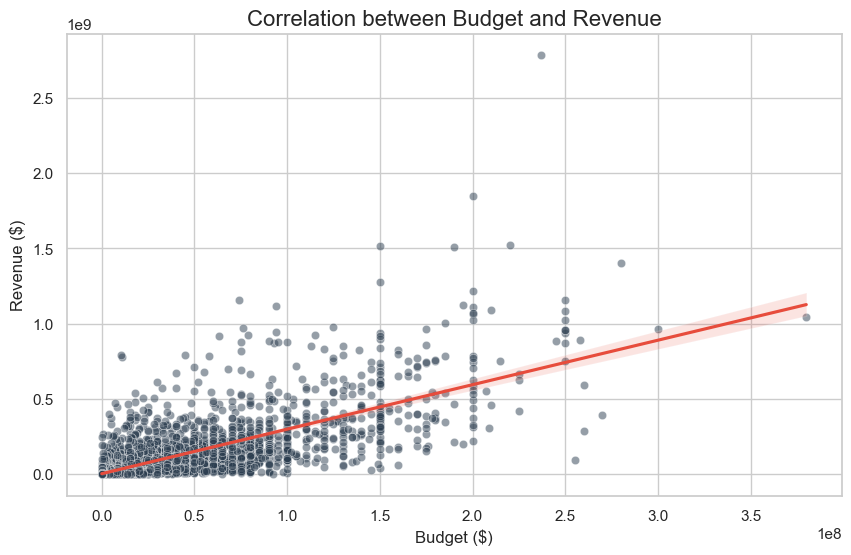

C:\Users\Emir\AppData\Local\Temp\ipykernel_219724\2854101283.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


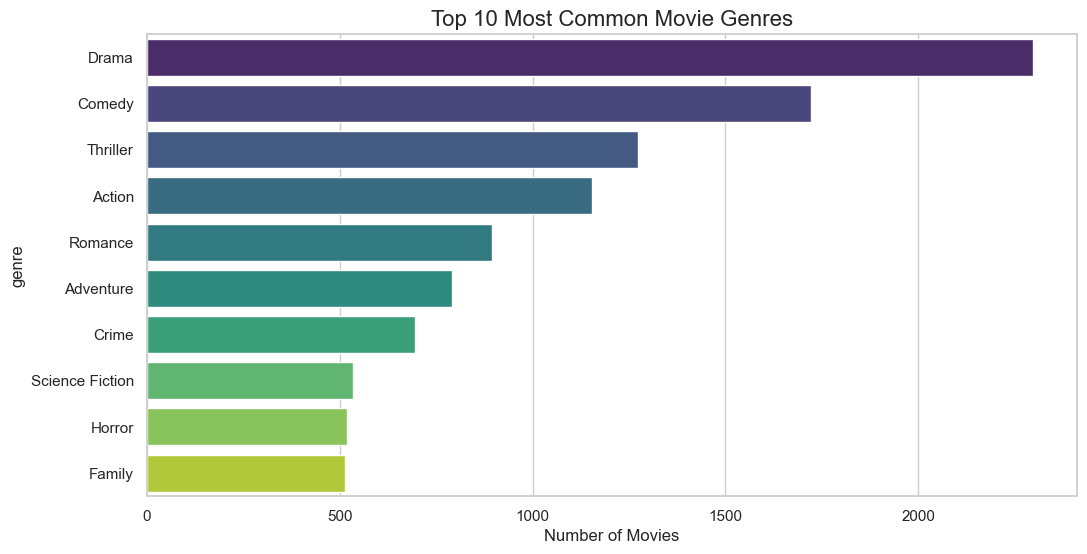

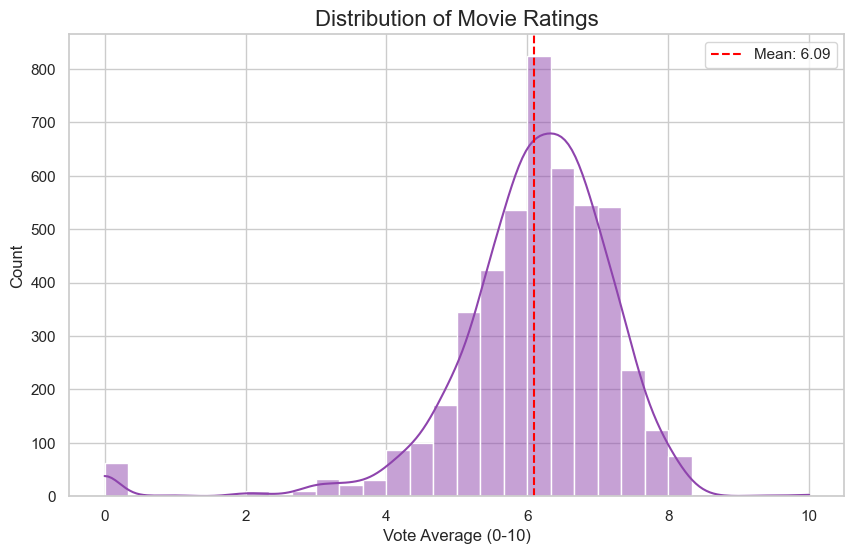

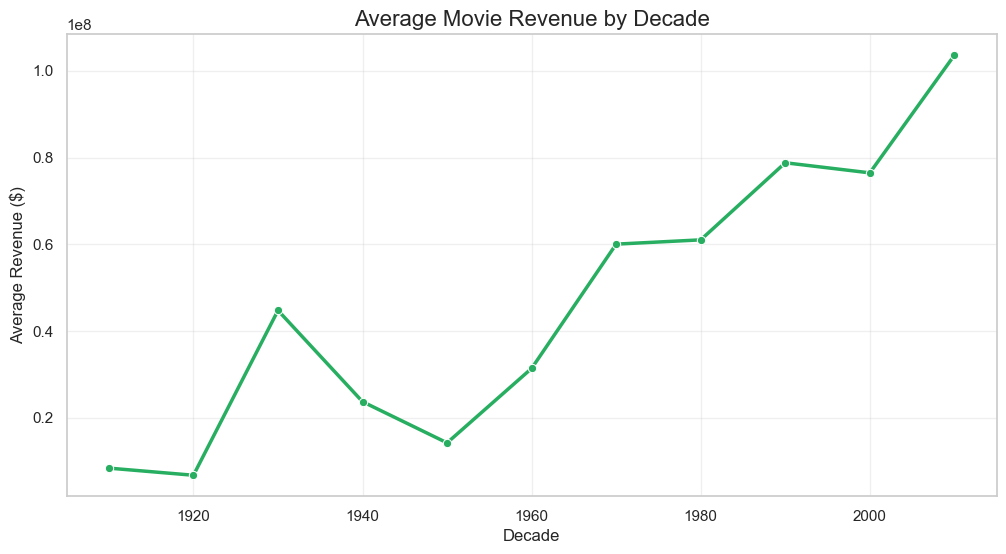

EDA Visuals generated and saved to 'docs/' folder.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import numpy as np

# Set style for professional visuals
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 1. LOAD PROCESSED DATA
# We use the cleaned data we created earlier
df = pd.read_csv('../data/processed/cleaned_movies.csv')
genres_df = pd.read_csv('../data/processed/movie_genres.csv')

# -------------------------------------------------------
# VISUAL 1: BUDGET vs REVENUE (Regression)
# -------------------------------------------------------
plt.figure(figsize=(10, 6))
# Filter out extreme outliers for better visualization
plot_data = df[(df['budget'] > 0) & (df['revenue'] > 0)]
sns.scatterplot(data=plot_data, x='budget', y='revenue', alpha=0.5, color='#2c3e50')
sns.regplot(data=plot_data, x='budget', y='revenue', scatter=False, color='#e74c3c')
plt.title('Correlation between Budget and Revenue', fontsize=16)
plt.xlabel('Budget ($)', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.savefig('../docs/budget_revenue_corr.png')
plt.show()

# -------------------------------------------------------
# VISUAL 2: TOP 10 GENRES BY COUNT
# -------------------------------------------------------
plt.figure(figsize=(12, 6))
top_genres = genres_df['genre'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 10 Most Common Movie Genres', fontsize=16)
plt.xlabel('Number of Movies', fontsize=12)
plt.savefig('../docs/top_genres.png')
plt.show()

# -------------------------------------------------------
# VISUAL 3: RATINGS DISTRIBUTION
# -------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.histplot(df['vote_average'], bins=30, kde=True, color='#8e44ad')
plt.title('Distribution of Movie Ratings', fontsize=16)
plt.xlabel('Vote Average (0-10)', fontsize=12)
plt.axvline(df['vote_average'].mean(), color='red', linestyle='--', label=f'Mean: {df["vote_average"].mean():.2f}')
plt.legend()
plt.savefig('../docs/rating_dist.png')
plt.show()

# -------------------------------------------------------
# VISUAL 4: DECADE TRENDS
# -------------------------------------------------------
df['decade'] = (df['release_year'] // 10) * 10
decade_stats = df.groupby('decade')['revenue'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=decade_stats, x='decade', y='revenue', marker='o', linewidth=2.5, color='#27ae60')
plt.title('Average Movie Revenue by Decade', fontsize=16)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Average Revenue ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.savefig('../docs/revenue_trend.png')
plt.show()

print("EDA Visuals generated and saved to 'docs/' folder.")